Avoid executing the wrapped or commented cells as they are computationally heavy. Intermediate results are saved as pickled

In [1]:
#!pip install -U sentence-transformers > /dev/null

In [51]:
#!pip install fast_pagerank

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [52]:
import json
import sklearn
import sklearn.model_selection
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from fast_pagerank import pagerank

In [7]:
# read plot summary dataframe 
df = pd.read_csv('../data_test/plot_summaries.csv')

In [3]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [9]:
%%time  
embedd =False
if embedd == True:
    # embedd plot summaries
    df["Embeddings"] = df["Summary"].apply(lambda x: model.encode(x))
    df.to_pickle('../data_test/plot_summaries_embeddings.pkl')

CPU times: user 1h 35min 58s, sys: 1min 39s, total: 1h 37min 38s
Wall time: 1h 38min 16s


Read Data to avoid executing the previous steps as they take more than one hour

In [13]:
df = pd.read_pickle('../data_test/plot_summaries_embeddings.pkl')

In [14]:
df.head(2)

,Wikipedia_Movie_ID,Summary,Embeddings
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...","[-0.0071002566, -0.010865058, -0.035646204, 0...."
1,31186339,The nation of Panem consists of a wealthy Capi...,"[0.05230585, 0.075655825, -0.002792074, -0.119..."


In [15]:
random_state = 42

TSNE 10

In [18]:
model_tsne = TSNE(perplexity=10, n_components=2, init='pca', n_iter=2500, random_state=random_state)

In [26]:
import numpy as np

In [27]:
tsne = model_tsne.fit_transform(np.array(df["Embeddings"].tolist()))

/Users/rayendhahri/opt/anaconda3/envs/machine/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/rayendhahri/opt/anaconda3/envs/machine/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [28]:
df['tsne_10_x'] = tsne[:,0]
df['tsne_10_y'] = tsne[:,1]

In [29]:
df.to_pickle('../data_test/plot_summaries_embeddings_tsne.pkl')

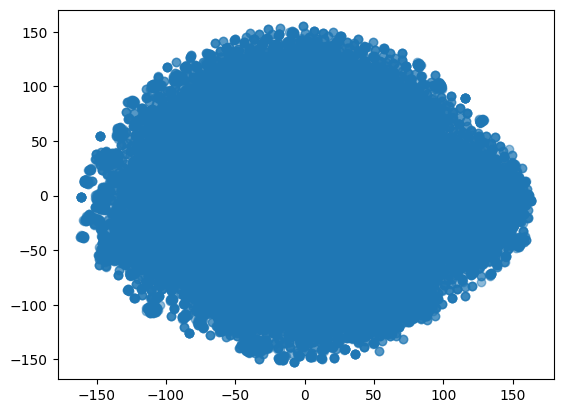

In [30]:
plt.scatter(df['tsne_10_x'], df['tsne_10_y'], alpha=.5)

TSNE 30

In [31]:
model_tsne30 = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=random_state)

In [32]:
tsne = model_tsne30.fit_transform(np.array(df["Embeddings"].tolist()))

/Users/rayendhahri/opt/anaconda3/envs/machine/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/rayendhahri/opt/anaconda3/envs/machine/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [33]:
df['tsne_30_x'] = tsne[:,0]
df['tsne_30_y'] = tsne[:,1]

In [34]:
df.to_pickle('../data_test/plot_summaries_embeddings_tsne_10_30.pkl')

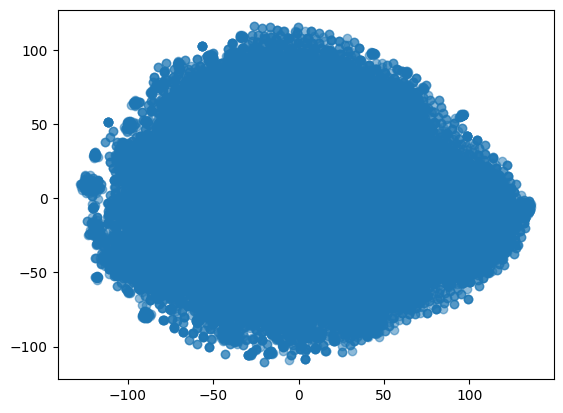

In [35]:
plt.scatter(df['tsne_30_x'], df['tsne_30_y'], alpha=.5)

Working on one instance/ movie

In [46]:
movie_sample = df.sample(1)

In [47]:
exploded = movie_sample['Summary'].values[0].split('.')

In [48]:
exploded

['The film opens with a hillbilly version of Little Red Riding Hood , telling the audience that she is taking "nourishment"  to her grandma, who lives on a country farm',
 ' At the farmhouse, a wolf  reveals himself to the audience, but refuses to eat Red as he is supposed to, as he is in love with Red and wishes to kiss her',
 " After a comical chase around the farmhouse, the wolf catches Red, and both prepare to kiss each other, when a telegram arrives for the wolf from his city cousin , inviting him to the city to meet the city's equivalent of Red ",
 ' Enamoured by her photograph, the country wolf departs immediately for the city',
 " The city wolf, a suave and sophisticated gentleman, takes his country cousin to his club, where the city's Red performs her dance routine ",
 ' The country wolf whistles and leers throughout, becoming completely aroused by Red',
 ' Before he can rush onto the stage to join her, however, his city cousin stops him , and takes him back to his home in the

In [49]:
!pip install sentence_transformers 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [50]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer("nlpaueb/bert-base-uncased-echr")

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

No sentence-transformers model found with name /Users/rayendhahri/.cache/torch/sentence_transformers/nlpaueb_bert-base-uncased-echr. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/rayendhahri/.cache/torch/sentence_transformers/nlpaueb_bert-base-uncased-echr were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be 

In [53]:
def gen_match_matrix(model, sents, min_match_score=0):
    sents1 = [x for x in sents]
    sents1_embeddings = model.encode(sents1)
    sim_matrix = cosine_similarity(sents1_embeddings, sents1_embeddings)
    super_threshold_indices = sim_matrix < min_match_score
    sim_matrix[super_threshold_indices] = 0
    #print(sim_matrix)
    return sim_matrix

In [54]:
def filter_ranked_list(ranked_sents, model, min_match=0.8, N=3):
    ranked_sents = [x[0] for x in ranked_sents]
    filtered_sents = []
    for i, s in enumerate(ranked_sents):
        if len(filtered_sents) >= N or len(filtered_sents) >= len(ranked_sents):
            break
        if len(filtered_sents) == 0:
            filtered_sents.append(s)
        else:
            matching_scores = gen_match_matrix(model, [s] + filtered_sents)
            max_sim = np.max(matching_scores[0][1:])
            # print(matching_scores)
            if max_sim < min_match:
                filtered_sents.append(s)
        
        # print(min_match)
    
    return filtered_sents

In [55]:
def apply_page_rank(sentences, p=0.85, min_match_score=0.5, min_len=5, max_len=35):
    cand_sents = [x for x in sentences if len(x.split()) < max_len and len(x.split()) > min_len]
    if len(cand_sents) == 0:
        #print('empty')
        return []
    # print(cands)
    # print(cands_qualities)
    cands_matching_mat = gen_match_matrix(model, cand_sents, min_match_score=min_match_score)
    pr = pagerank(cands_matching_mat, p=p)  # it looks like modifying the initial probability doesn't help
    # pr=pagerank(cands_matching_mat, p=p)
    ranked_candidates = list(zip(cand_sents, pr))
    return sorted(ranked_candidates, key=lambda x: -x[1])

In [57]:
ranked_sents_temp = apply_page_rank(exploded, p=0.2, min_match_score=0.5)
ranked_kps_temp = filter_ranked_list(ranked_sents_temp, model, min_match=0.6, N=2) # decreased the min math to ensure a higher contextuel coverage

/Users/rayendhahri/opt/anaconda3/envs/machine/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:168: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [58]:
ranked_kps_temp

[" Seeing an opportunity to see the city's Red again, the country wolf promptly decides to take his city cousin back home, and drives off back to the city",
 ' The country wolf whistles and leers throughout, becoming completely aroused by Red']